In [ ]:
library(tidyverse)

install.packages("maps")
library(maps)

options(repr.plot.width=5, repr.plot.height=4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




# STATS 306
## Homework 5: Exploratory Data Analysis, Relational Data and SQL

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE". All of the problems in this problem set use the `nycflights13` data:

This package provides the following data tables.

* `?flights`: all flights that departed from NYC in 2013
* `?weather`: hourly meterological data for each airport
* `?planes`: construction information about each plane
* `?airports`: airport names and locations
* `?airlines`: translation between two letter carrier codes and names

In [ ]:
install.packages("nycflights13")
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Problem 1: Exploratory Data Analysis on the `Flights` Data (4.5 points)

For this question, there can be multiple correct answers.

**(a)** Focus on the following airlines: American, Delta, JetBlue, US Airways and United, and consider only non-cancelled flights (i.e., `arr_delay` is not `NA`). For a given flight, its capacity is defined as the number of seats in the aircraft used for that flight. To make things simple, whenever a flight's capacity is unknown, we set it to 50.

Your friend, Haerin, comes to you with a curious question: "For each airline, do you know whether its total capacity in 2013 roughly uniformly distributed across all 12 months?"

As a STATS 306 student, please help Haerin by producing an appropriate plot. Make sure to use appropriate titles and axis labels. Explain why the plot you produced is appropriate. ***(1.5 points)***

In [ ]:
# YOUR SOLUTION HERE

**(b)** Haerin is impressed with your data wrangling and visualization skills. Wasting no time, she comes up with another question:

"According to Wikipedia, there are more Boeing 737 as compared to Airbus A320 and its variants (Airbus A318, A319 and A321). If I were to guess, this means that there are more Boeing 737 flights than Airbus A318, A319, A320 and A321 flights combined for each origin airport. Could you check whether my guess is correct?"

Produce a plot which answers Haerin's question. Make sure to use appropriate titles and axis labels. Explain how the plot you produced can answer Haerin's question. ***(1.5 points)***

*(Note: for this question, include both cancelled and non-cancelled flights.)*



In [ ]:
# YOUR SOLUTION HERE

**(c)** Haerin asks one last question.

"Considering that the three origin airports, JFK, EWR and LGA, are in close proximity to each other, I would imagine that the temperatures in these airports should approximately be the same. Could you please check whether there are times **in January** at which there exist two airports whose temperatures differ by more than 10 degrees? By *time*, I am referring to a (`year`, `month`, `day`, `hour`) tuple."

Produce a table which answers Haerin's question. How many such times (if any) are there? ***(1.5 points)***

*(Note: for simplicity, exclude times with NAs in temperature for at least one airport.)*

In [ ]:
# YOUR SOLUTION HERE

## Problem 2: Writing SQL Queries (1.5 points)
The following code (which may take a while to run) loads `nycflights13` into a SQLite database:

In [ ]:
# SQLite database
install.packages('RSQLite')

library(DBI)
library(RSQLite)

con <- dbConnect(SQLite(), ":memory:")
copy_to(con, flights, "flights")
copy_to(con, airports, "airports")
copy_to(con, airlines, "airlines")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plogr’




For each question below, write an appropriate SQL query that produces the answer. For example, if the question was "How many flights departed each month", an appropriate answer would be:

In [ ]:
dbGetQuery(con,
           "SELECT month, COUNT(month)
           FROM flights
           GROUP BY month")

month,COUNT(month)
<int>,<int>
1,27004
2,24951
3,28834
4,28330
5,28796
6,28243
7,29425
8,29327
9,27574


**Your answers should only use SQL -- no dplyr allowed!** (However, it is fine to use dplyr to check your answers.)

**(a)** Display all United routes with an average air time of more than 6 hours.

Your table should have 3 columns: `origin`, `dest`, `avg_air_time`. ***(0.5 points)***

In [ ]:
# YOUR SOLUTION HERE

**(b)** Display the proportions of non-cancelled flights (i.e., `arr_delay` is not `NA`) for each airline, rounded to 2 decimal places.

Your table should have 2 columns: `carrier`, `prop_non_cancel`. Also, the rows should be arranged in descending order of `prop_non_cancel`. ***(0.5 points)***

In [ ]:
# YOUR SOLUTION HERE

**(c)** Display 3 days with the lowest average air time from JFK to LAX.

Your table should have 4 columns: `year`, `month`, `day`, `avg_air_time`.
***(0.5 points)***

In [ ]:
# YOUR SOLUTION HERE

## Problem 3: Joins (4 points)

You can use dplyr package for this problem

(a) Compute the number of flights for each destination in the continental U.S. and save the output to a variable called `n_flights_per_dest`. This table should contain 4 columns: `dest`, `lat`, `lon`, and `n` (one row for each destination). How many rows does this table contain? 

Then, visualize this table on a map, as shown below. ***(2.5 points)***

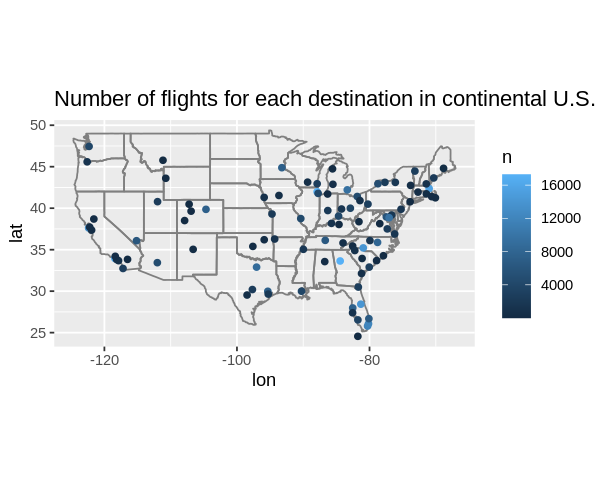

In [ ]:
# YOUR SOLUTION HERE

(b) Join the `weather` and `flights` tables by `year`, `month` and `day`, keeping only rows in `weather` which can be matched to a row in the `flights` table. Name the new table `weather_combined`. Use `weather_combined` to plot the distribution of humidity for each origin airport.

Explain if there is any variations in the distributions across origin airports. ***(1.5 points)***

In [ ]:
# YOUR SOLUTION HERE